In [2]:

import pandas as pd
import numpy as np

In [3]:

df = pd.read_csv('cars_cleaned.csv')
df.head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,black
1,46463,2015.0,gmc,sierra 1500,excellent,4 cylinders,gas,7554.0,clean,automatic,4wd,compact,hatchback,white
2,49999,2018.0,ford,f-450,like new,4 cylinders,diesel,70150.0,clean,automatic,4wd,compact,pickup,white
3,13999,2009.0,ram,f-450,salvage,4 cylinders,gas,120057.0,clean,automatic,4wd,compact,pickup,silver
4,34500,2017.0,ford,f-350,like new,4 cylinders,diesel,95484.0,clean,automatic,4wd,compact,pickup,white


In [6]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

df[['manufacturer', 'model', 'condition', 'cylinders','fuel','title_status', 'transmission','drive','size','type','paint_color']] = df[['manufacturer', 'model', 'condition','cylinders', 'fuel','title_status', 'transmission','drive','size','type','paint_color']].apply(le.fit_transform)

In [7]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= df.price
X= df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(289212, 13) (289212,)
(72304, 13) (72304,)


In [8]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [14]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [13]:

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2121.42
Mean Squared Error: 15525129.48
Root Mean Squared Error: 3940.19


In [15]:

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [16]:

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2041.17
Mean Squared Error: 14705345.22
Root Mean Squared Error: 3834.75


In [17]:
# Visualizing a Single Decision Tree

# Import tools needed for visualization
rf= regressor
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [19]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot',
                feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

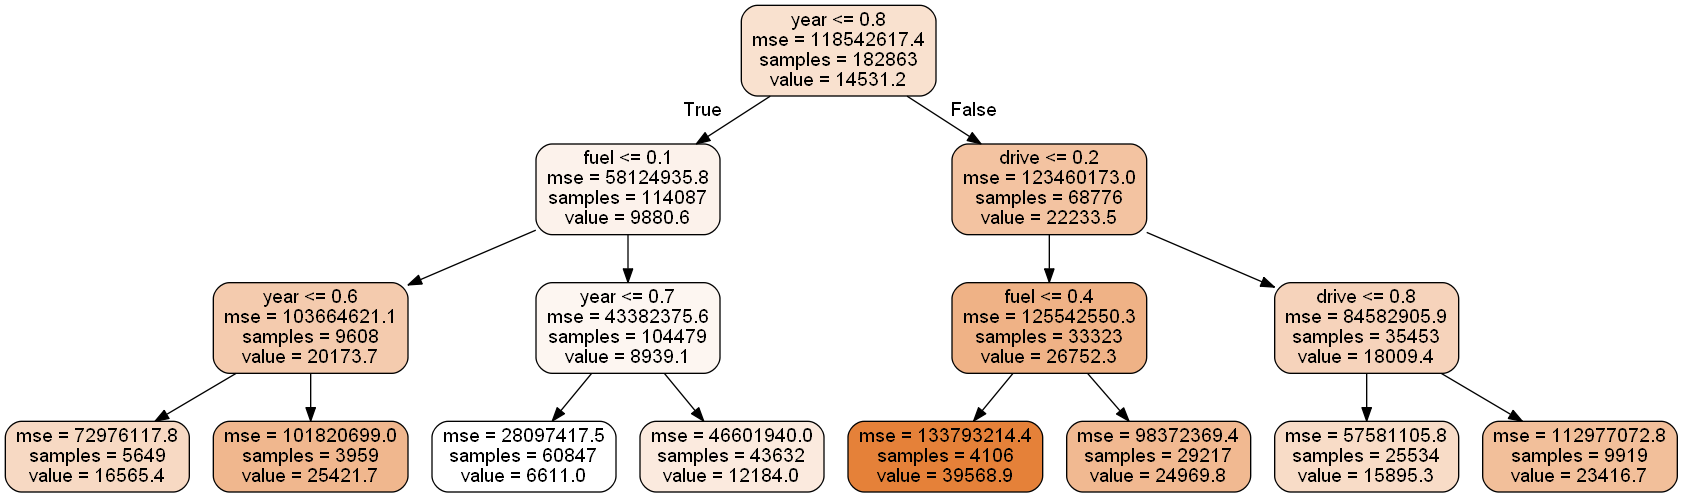

In [20]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'small_tree.png')

In [21]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: year                 Importance: 0.38
Variable: odometer             Importance: 0.14
Variable: model                Importance: 0.12
Variable: fuel                 Importance: 0.1
Variable: drive                Importance: 0.1
Variable: manufacturer         Importance: 0.06
Variable: cylinders            Importance: 0.03
Variable: type                 Importance: 0.02
Variable: paint_color          Importance: 0.02
Variable: condition            Importance: 0.01
Variable: title_status         Importance: 0.01
Variable: transmission         Importance: 0.01
Variable: size                 Importance: 0.01


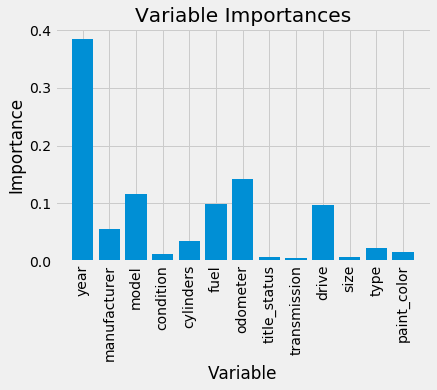

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

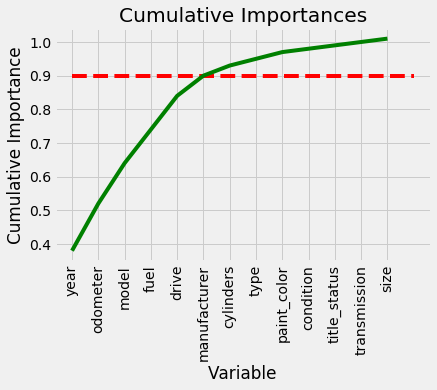

In [23]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

In [25]:
# Find number of features for cumulative importance of 90%

# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 7


In [26]:

# New random forest with only the most important variables
from sklearn.ensemble import RandomForestRegressor
rf_most_important = RandomForestRegressor(n_estimators=200, random_state=0)

In [27]:
# Extract the most important features
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


important_indices = [feature_list.index('year'), feature_list.index('drive'), 
                     feature_list.index('odometer'), feature_list.index('fuel'),
                     feature_list.index('model'), feature_list.index('cylinders'), feature_list.index('manufacturer')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

In [28]:

# Train the random forest
rf_most_important.fit(train_important, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [29]:
predictions = rf_most_important.predict(test_important)


In [30]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 1960.65
Mean Squared Error: 14216484.3
Root Mean Squared Error: 3770.48


In [31]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [33]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mse(y_test, y_pred_lr))
rr = Ridge()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
rmse_rr = np.sqrt(mse(y_test, y_pred_rr))
print('-------------Linear Regression-------------')
print("RMSE = {:.2f}".format((rmse_lr)))
accuracy = lr.score(X_test,y_test)
print('Accuracy = ', accuracy*100,'%')
print('-------------Ridge Regression--------------')
print("RMSE = {:.2f}".format((rmse_rr)))

-------------Linear Regression-------------
RMSE = 7451.35
Accuracy =  52.41732809906179 %
-------------Ridge Regression--------------
RMSE = 7451.35


In [34]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

4026.925694654272
[ 25054.50868825   -641.70843937    178.49293008   1405.67905761
  12259.60178271 -16048.9438014  -20375.90254647  -5641.90416792
    972.02663585  -4010.20491545   -202.48889334    655.63081845
    583.50219941]


In [38]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
year,25054.508688
manufacturer,-641.708439
model,178.492930
condition,1405.679058
cylinders,12259.601783
fuel,-16048.943801
odometer,-20375.902546
title_status,-5641.904168
transmission,972.026636
drive,-4010.204915


In [36]:
OLS_pred= regressor.predict(X_train)


In [37]:

from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_train, OLS_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_train, OLS_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_train, OLS_pred)),2))

Mean Absolute Error: 5367.74
Mean Squared Error: 56971507.79
Root Mean Squared Error: 7547.95


In [39]:
y_pred = regressor.predict(X_test)


In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
round(df1,2)

,Actual,Predicted
240818,3500,4213.58
204579,22900,18572.94
83638,7800,8509.26
345203,21630,21366.03
218432,16942,28782.51
12531,44999,39269.24
253595,20995,19663.09
162014,15700,15152.69
191794,9995,7529.49
41615,16995,16581.78


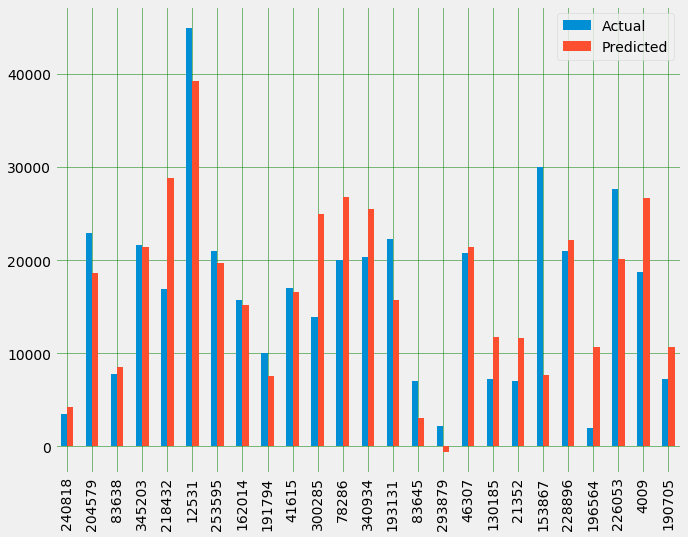

In [43]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
y_pred = regressor.predict(X_test)


In [44]:

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 5330.43
Mean Squared Error: 55522615.55
Root Mean Squared Error: 7451.35


In [45]:

alphas = 10**np.linspace(10,-2,100)*0.5

Text(0, 0.5, 'weights')

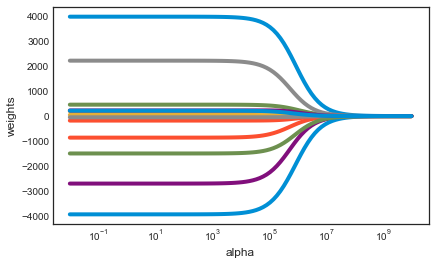

In [46]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('seaborn-white')

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf= Ridge()
coefs = []

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(scale(X_train), y_train)
    coefs.append(clf.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [47]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

In [48]:
# Fit a ridge regression on the training data
pred2 = ridgecv.predict(X_test)
# Use this model to predict the test data
print(pd.Series(ridgecv.coef_, index = X.columns))

year            24976.664252
manufacturer     -641.291318
model             176.518613
condition        1402.455940
cylinders       12195.381556
fuel           -15961.703321
odometer       -20298.658177
title_status    -5612.082751
transmission      969.832659
drive           -3997.051526
size             -202.308361
type              656.548430
paint_color       581.332961
dtype: float64


In [49]:

from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred2),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred2),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2))

Mean Absolute Error: 5330.39
Mean Squared Error: 55525009.91
Root Mean Squared Error: 7451.51


Text(0.5, 1.0, 'Feature importance using Ridge Model')

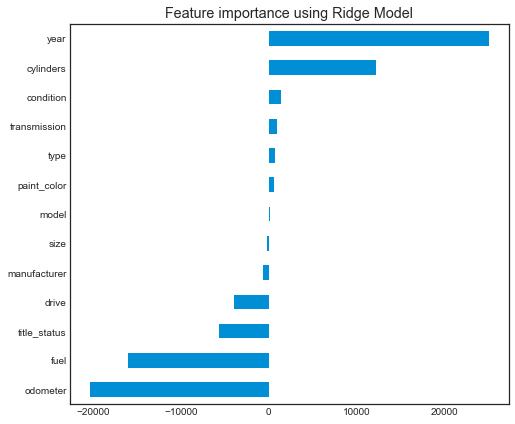

In [50]:
coef_ridge= pd.Series(ridgecv.coef_, index = X.columns)
imp_coef = coef_ridge.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

In [51]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('seaborn-white')

No handles with labels found to put in legend.


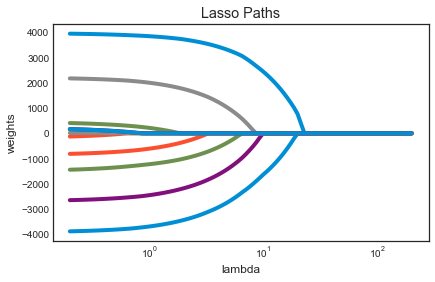

In [52]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
alphas= np.logspace(-1,2,100)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso Paths')
plt.legend()

In [53]:

from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

reg = LassoCV( alphas = None, cv = 10, max_iter = 100000, normalize = True)
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))),2))

Best alpha using built-in LassoCV: 0.011426
Best score using built-in LassoCV: 0.521660
Root Mean Squared Error: 7451.55


In [55]:

y_pred = reg.predict(X_test)

In [56]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 5330.77
Mean Squared Error: 55525588.3
Root Mean Squared Error: 7451.55


In [57]:
coef

year            25037.506678
manufacturer     -619.264699
model             154.547083
condition        1389.044314
cylinders       12236.291874
fuel           -16012.467473
odometer       -20347.030381
title_status    -5603.959347
transmission      940.956309
drive           -3993.448278
size             -178.593309
type              637.370898
paint_color       568.059576
dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso Model')

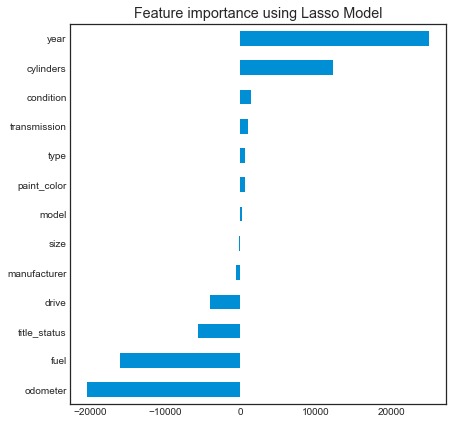

In [58]:

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [59]:

lasso001 = Lasso(alpha=100, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=100:", train_score001)
print ("test score for alpha =100: ", test_score001)
print ("number of features used: for alpha =100: ", coeff_used001)

training score for alpha=100: 0.5060004737715347
test score for alpha =100:  0.5076582328156606
number of features used: for alpha =100:  7


In [61]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

In [62]:
rmse_val2 = [] #to store rmse values for different k
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6494.439731128698
RMSE value for k=  2 is: 5913.196822437939
RMSE value for k=  3 is: 5769.998975058871
RMSE value for k=  4 is: 5711.922134216263
RMSE value for k=  5 is: 5694.072773277145
RMSE value for k=  6 is: 5691.544463988391
RMSE value for k=  7 is: 5690.728012924988
RMSE value for k=  8 is: 5690.903386568133
RMSE value for k=  9 is: 5692.50521168898
RMSE value for k=  10 is: 5702.010889671423
RMSE value for k=  11 is: 5712.377961231587
RMSE value for k=  12 is: 5731.753882496768
RMSE value for k=  13 is: 5742.891973088634
RMSE value for k=  14 is: 5758.201174252802
RMSE value for k=  15 is: 5765.216297501169


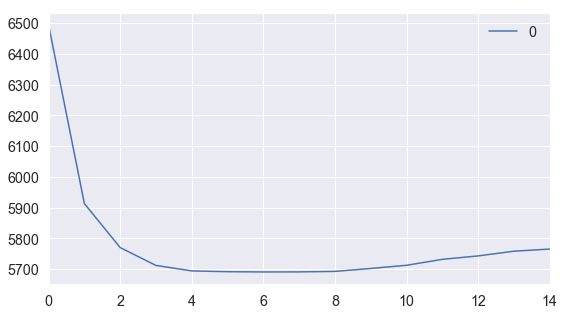

In [63]:

#plotting the rmse values against k values
import seaborn as sns

sns.set(font_scale=1.3)

curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot(figsize=(8,5))

In [64]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [65]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.11240042044700155


In [66]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
accuracy = knn.score(X_test,y_test)
print("Accuracy:", round(accuracy*100,2),'%')

Mean Absolute Error: 4680.22
Mean Squared Error: 59396630.18
Root Mean Squared Error: 7706.92
Accuracy: 11.24 %


In [67]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [68]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

C:\Users\49173\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:43:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 9561.999716


In [69]:
# fit model
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

predictions = xg_reg.predict(X_test)

C:\Users\49173\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:43:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [70]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 6226.95
Mean Squared Error: 91431838.58
Root Mean Squared Error: 9562.0


In [71]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

C:\Users\49173\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:44:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [72]:

A, b = X.iloc[:,:-1],X.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=A,label=b)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

C:\Users\49173\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\49173\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [73]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,6.169518,0.001037,6.169980,0.002714
1,5.829809,0.001621,5.831428,0.003648
2,5.540324,0.001550,5.539880,0.002581
3,5.291203,0.001897,5.291465,0.001480
4,5.080449,0.002420,5.080934,0.000754


In [74]:
print((cv_results["test-rmse-mean"]).tail(1))

49    4.039571
Name: test-rmse-mean, dtype: float64


In [75]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


[17:44:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


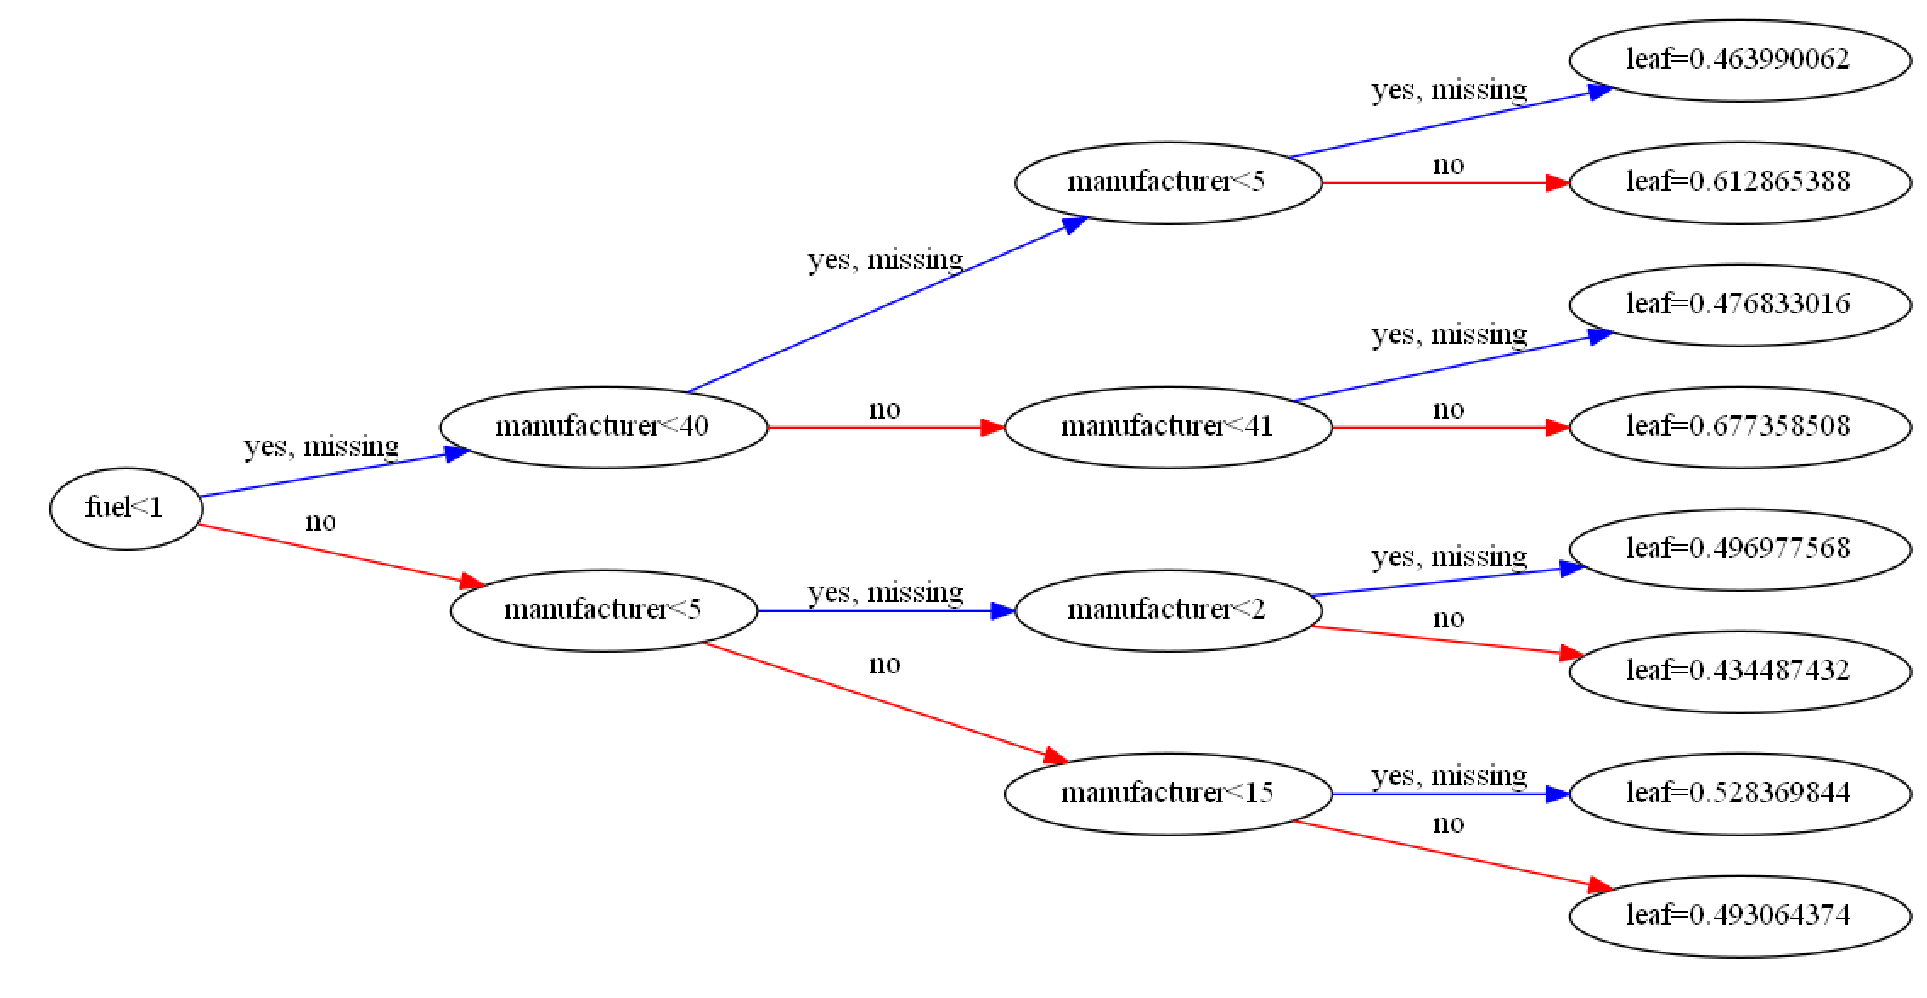

In [84]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,rankdir='LR', num_trees=0)
plt.rcParams['figure.figsize'] = [30,30]
plt.show()

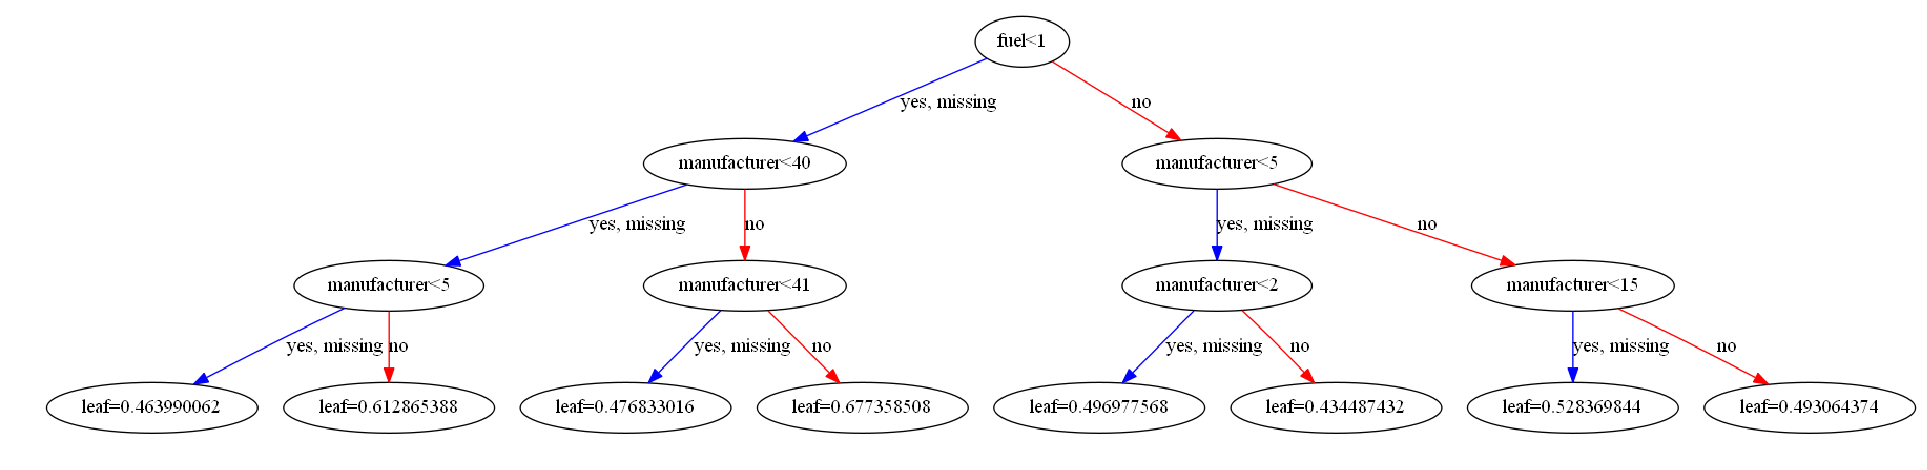

In [86]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [30,300]
plt.show()

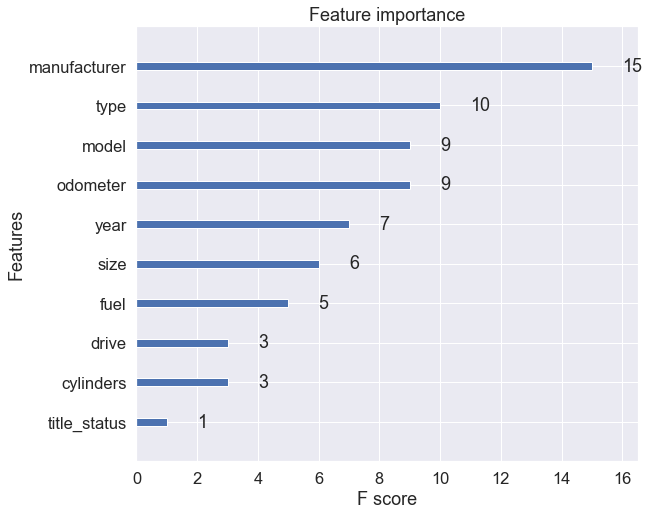

In [88]:
import seaborn as sns
xgb.plot_importance(xg_reg)
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = [2, 2]
plt.show()

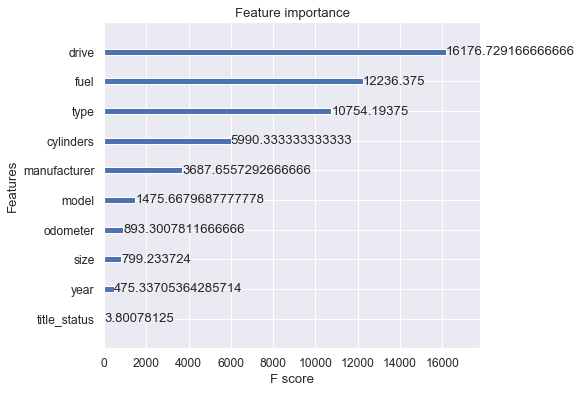

In [90]:
import seaborn as sns
xgb.plot_importance(xg_reg, importance_type= 'gain')
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = [20,20]
plt.show()